---
---
# **ANÁLISIS Y VISUALIZACIÓN DE DATOS**

![](./facultad_de_ingeniera_y_tecnologa_uss_logo.jpeg)

**Software para Data Science II - Magíster en Data Science - Facultad de Ingeniería, Arquitectura y Diseño - Universidad San Sebastián**

**Docente:** Paulette N. Reyes Baeza

**Autor:** Gonzalo Daniel Cayunao Erices

<img src='https://cdn-icons-png.flaticon.com/512/25/25231.png' width=3%>   [Github del Proyecto](https://github.com/gonzakayunawel/casas_usadas_chile_analysis)

---
---

## **Valor Casas Usadas, Chile, RM, 18/07/2023**
Avisos de venta de casas de la Region Metropolitana, Santiago

![](./dataset-cover.jpg)

### **Sobre el DataSet**
Datos extraídos usando la técnica de *Web Scraping* desde el sitio web https://chilepropiedades.cl/

Este dataset solo contiene CASAS en venta. No incluye departamentos o terrenos.

Al utilizar *Web Scraping* es muy posible que hayan avisos cuya información fue ingresada incorrectamente. ej: Una casa con 100 km2 de terreno.

### **Contenidos**
Este dataset contiene 12 columnas

- Price_CLP: Precio de casa en pesos chilenos (CLP)
- Price_UF: Precio de casa en unidades de fomento (UF)
- Price_USD: Precio de casa en dolares americanos (USD)
- Comuna: Comuna en la que se encuentra la casa.
- Ubicacion: Ubicación más específica de la casa
- Dorms: Cuantas habitaciones tiene la casa
- Baths: Cuantos baños tiene la casa
- Built Area: Cuantos metros cuadrados construidos tiene la casa
- Total Area: Cuantos metros cuadrados tiene toda la propiedad
- Parking: Cuantos estacionamentos tiene la casa
- id: Codigo de la casa en https://chilepropiedades.cl/ ; Ej: https://chilepropiedades.cl/ver-publicacion/11607213
- Realtor: El corredor de bienes raíces

### **Fuente de los datos**
https://www.kaggle.com/datasets/luisfelipetn/valor-casas-usadas-chile-rm-08032023

# Resumen del dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("./2023-03-08 Precios Casas RM.csv")
df = pd.DataFrame(data)

In [3]:
df.shape

(7779, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   7779 non-null   int64  
 1   Price_UF    7779 non-null   int64  
 2   Price_USD   7779 non-null   int64  
 3   Comuna      7779 non-null   object 
 4   Ubicacion   7779 non-null   object 
 5   Dorms       7779 non-null   int64  
 6   Baths       7714 non-null   float64
 7   Built Area  7533 non-null   float64
 8   Total Area  7571 non-null   float64
 9   Parking     5489 non-null   float64
 10  id          7779 non-null   int64  
 11  Realtor     7184 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 729.4+ KB


In [5]:
df.isna().sum().sort_values(ascending=False)

Parking       2290
Realtor        595
Built Area     246
Total Area     208
Baths           65
Price_CLP        0
Price_UF         0
Price_USD        0
Comuna           0
Ubicacion        0
Dorms            0
id               0
dtype: int64

In [6]:
df.describe()

,Price_CLP,Price_UF,Price_USD,Dorms,Baths,Built Area,Total Area,Parking,id
count,7.779000e+03,7779.000000,7.779000e+03,7779.000000,7714.000000,7533.000000,7571.000000,5489.000000,7.779000e+03
mean,3.642481e+08,10234.571153,4.536091e+05,3.994087,2.653746,229.923669,807.919826,2.980506,9.910828e+06
std,3.868810e+08,10870.491584,4.817945e+05,1.622821,1.465103,1676.898812,9050.893115,17.749384,2.046317e+06
min,2.085000e+03,0.000000,3.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.213620e+06
25%,1.200000e+08,3372.000000,1.494400e+05,3.000000,2.000000,85.000000,129.500000,1.000000,8.563078e+06
50%,2.050000e+08,5760.000000,2.552930e+05,4.000000,2.000000,128.000000,210.000000,2.000000,1.054807e+07
75%,4.911420e+08,13800.000000,6.116340e+05,5.000000,3.000000,200.000000,443.000000,3.000000,1.152463e+07
max,5.516450e+09,155000.000000,6.869801e+06,27.000000,29.000000,120000.000000,678000.000000,1269.000000,1.234149e+07


In [7]:
df[df["Dorms"] == df["Dorms"].max()]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
4579,540000000,15173,672478,Independencia,maruri344,27,6.0,651.0,651.0,NaN,11244076,Todo Propiedades


In [8]:
df[df["Baths"] == df["Baths"].max()]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
5838,1850680000,52000,2304707,Santiago,Hotel,25,29.0,1200.0,500.0,6.0,5345651,Nativo Propiedades


In [9]:
df[df["Parking"] == df["Parking"].max()]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
253,925340000,26000,1152354,Ñuñoa,Hernancortes//pedrodevaldivia,11,4.0,567.0,702.0,1269.0,9275128,Unne


In [10]:
df[df["Parking"] == 30.0]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
2767,729595000,20500,908587,Colina,LosIngleses,9,7.0,415.0,5000.0,30.0,9635872,Easyprop
5309,320000000,8991,398506,Peñaflor,LosNogalesdeDonToribio,7,5.0,400.0,5000.0,30.0,9338062,Grupo Premium Propiedades Santiago


In [11]:
duplicated_values = df[df.duplicated(subset=['id'], keep=False)]
duplicated_values

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
5583,266925000,7500,332410,Tiltil,Sevendecasaconampliaparcelaentiltil,4,3.0,250.0,6000.0,1.0,10215663,Movahome Corredores Integrados
5584,266925000,7500,332410,Tiltil,Sevendecasaconampliaparcelaentiltil,4,3.0,250.0,6000.0,1.0,10215663,Movahome Corredores Integrados


## Inconsistencias en los datos

El resumen muestra que las columnas de Parking, Realtor, Built Area, Total Area y Baths poseen datos de tipo NaN. Por otro lado, tenemos columnas con valores redundantes o que poseen una dependencia, como es el caso de las columnas de precio en UF y precio en USD, que son valores que se pueden calcular a partir de Precio en CLP. La columna Price_UF posee una valor mínimo de 0 lo que no es coherente con el valor en pesos. En la columna Dorms hay una propiedad que presenta 27 dormitorios, y en la columna Baths hay una que presenta 29.0 baños, esta ubicación corresponde a un Hotel. En Parking se observa una propiedad con 1269.0 estacionamientos. En cuanto a los tipos de datos, hay inconsistencias en Price_UF y Price_USD ya que deberían ser `float`, y sin embargo son `int`. La columna Price_CLP corresponde que sea `int` ya que no se trabaja con fracciones de pesos en Chile. Dorms y Parking se leyeron como `float` pero deberían ser `int` ya que son datos discretos, y que no aceptan valores intermedios. Finalmente tenemos un dato duplicado que corresponde al id: 10215663.

# Limpieza de los datos

### Elminar Duplicados

In [12]:
booleand_mask = df.duplicated(subset=['id'], keep='last')
df = df[~booleand_mask]

### Elminar datos NaN

In [14]:
from math import ceil
avg_parking = df["Parking"].astype("float").mean(axis=0)
avg_parking = ceil(avg_parking)
df["Parking"].replace(np.nan, avg_parking, inplace=True)
print("Average of Parking:", avg_parking)

Average of Parking: 3


In [15]:
avg_built_area = df["Built Area"].astype("float").mean(axis=0)
avg_built_area = round(avg_built_area, 2)
df["Built Area"].replace(np.nan, avg_built_area, inplace=True)
print("Average of Built Area:", avg_built_area)

Average of Built Area: 229.92


In [16]:
avg_total_area = df["Total Area"].astype("float").mean(axis=0)
avg_total_area = round(avg_total_area, 2)
df["Total Area"].replace(np.nan, avg_total_area, inplace=True)
print("Average of Total Area:", avg_total_area)

Average of Total Area: 807.23


In [17]:
avg_baths = df["Baths"].astype("float").mean(axis=0)
avg_baths = ceil(avg_baths)
df["Baths"].replace(np.nan, avg_baths, inplace=True)
print("Average of Baths:", avg_baths)

Average of Baths: 3


In [18]:
mode_realtor = df["Realtor"].value_counts().idxmax()
df["Realtor"].replace(np.nan, mode_realtor, inplace=True)
print("Mode of Realtor:", mode_realtor)

Mode of Realtor: Unne


In [19]:
df.isna().sum().sort_values(ascending=False)

Price_CLP     0
Price_UF      0
Price_USD     0
Comuna        0
Ubicacion     0
Dorms         0
Baths         0
Built Area    0
Total Area    0
Parking       0
id            0
Realtor       0
dtype: int64

### Cambiar tipos de dato

In [20]:
df[["Price_USD", "Price_UF"]] = df[["Price_USD", "Price_UF"]].astype("float")
df[["Dorms", "Parking"]] = df[["Dorms", "Parking"]].astype("int")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7778 entries, 0 to 7778
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   7778 non-null   int64  
 1   Price_UF    7778 non-null   float64
 2   Price_USD   7778 non-null   float64
 3   Comuna      7778 non-null   object 
 4   Ubicacion   7778 non-null   object 
 5   Dorms       7778 non-null   int32  
 6   Baths       7778 non-null   float64
 7   Built Area  7778 non-null   float64
 8   Total Area  7778 non-null   float64
 9   Parking     7778 non-null   int32  
 10  id          7778 non-null   int64  
 11  Realtor     7778 non-null   object 
dtypes: float64(5), int32(2), int64(2), object(3)
memory usage: 729.2+ KB


In [13]:
df[df["Parking"] >= 13.0].sort_values(by="Parking", ascending=False)[:10]

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
253,925340000,26000,1152354,Ñuñoa,Hernancortes//pedrodevaldivia,11,4.0,567.0,702.0,1269.0,9275128,Unne
1495,209981000,5900,261496,EstaciónCentral,GeneralVelásquez,3,2.0,150.0,150.0,307.0,11978650,Easyprop
5146,770523500,21650,959556,Peñaflor,LasPalmeras,3,5.0,505.0,7332.0,60.0,9338146,Grupo Premium Propiedades Santiago
5309,320000000,8991,398506,Peñaflor,LosNogalesdeDonToribio,7,5.0,400.0,5000.0,30.0,9338062,Grupo Premium Propiedades Santiago
2767,729595000,20500,908587,Colina,LosIngleses,9,7.0,415.0,5000.0,30.0,9635872,Easyprop
6890,1420041000,39900,1768420,Vitacura,VíaEscarlata,5,6.0,714.0,2000.0,23.0,5881334,Unne
2694,1420041000,39900,1768420,Vitacura,ClubMilitarLoCurro,5,5.0,714.0,5640.0,23.0,11680591,Unne
5960,708241000,19900,881994,Colina,PoloManquehue,5,5.0,404.0,5595.0,22.0,7735656,Unne
5860,106058200,2980,132077,Peñalolén,TaguaTagua/ManutaraMunicipalidadPeñalolén,3,1.0,71.0,121.0,22.0,11100774,Nexxos
2756,1281240000,36000,1595567,Colina,lasbrisaschicureo,4,4.0,327.0,10153.0,22.0,7091820,Unne


## Identificar ouliers

In [54]:
numeric_cols = df.select_dtypes(include=["number"])
numeric_cols.columns

Index(['Price_CLP', 'Price_UF', 'Price_USD', 'Dorms', 'Baths', 'Built Area',
       'Total Area', 'Parking', 'id'],
      dtype='object')

In [55]:
numeric_cols = numeric_cols[
    [
        "Price_CLP",
        "Price_UF",
        "Price_USD",
        "Dorms",
        "Baths",
        "Built Area",
        "Total Area",
        "Parking",
    ]
]

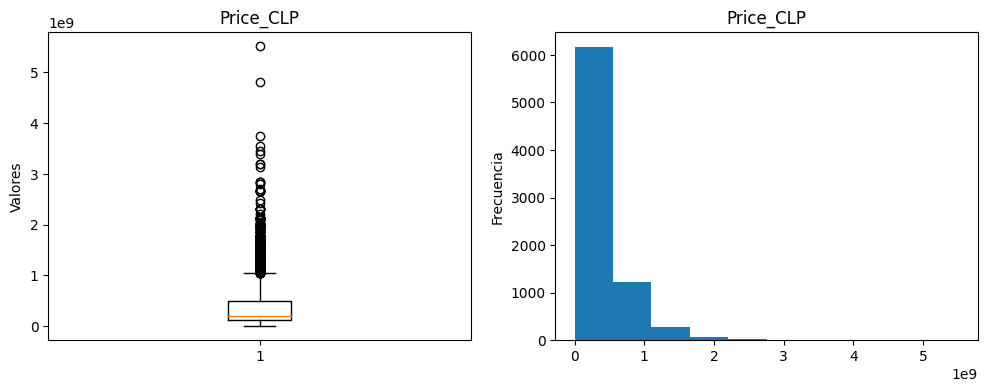

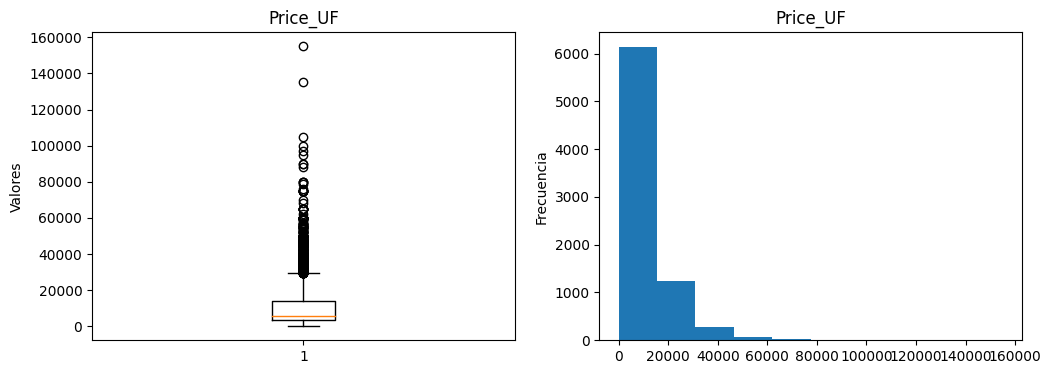

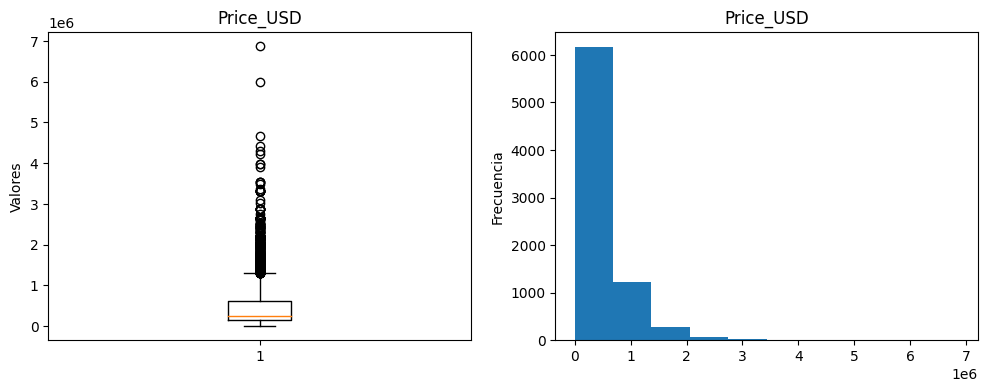

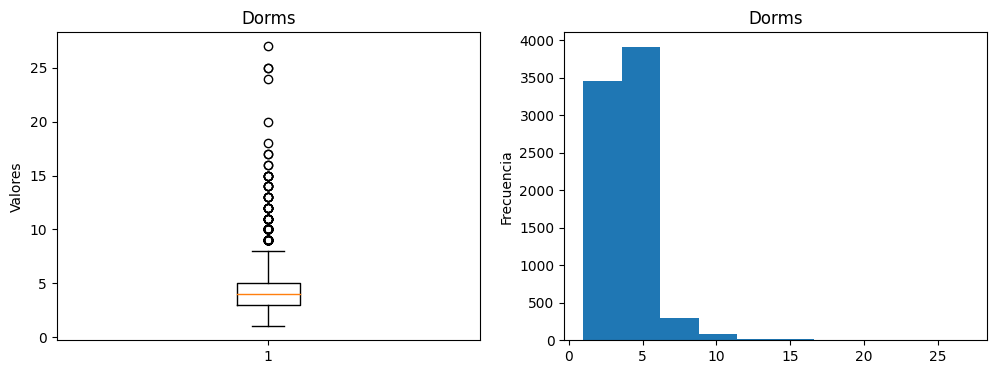

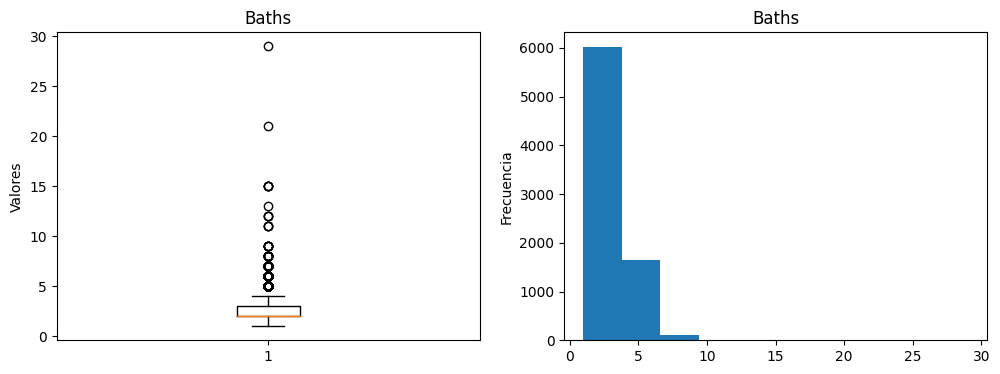

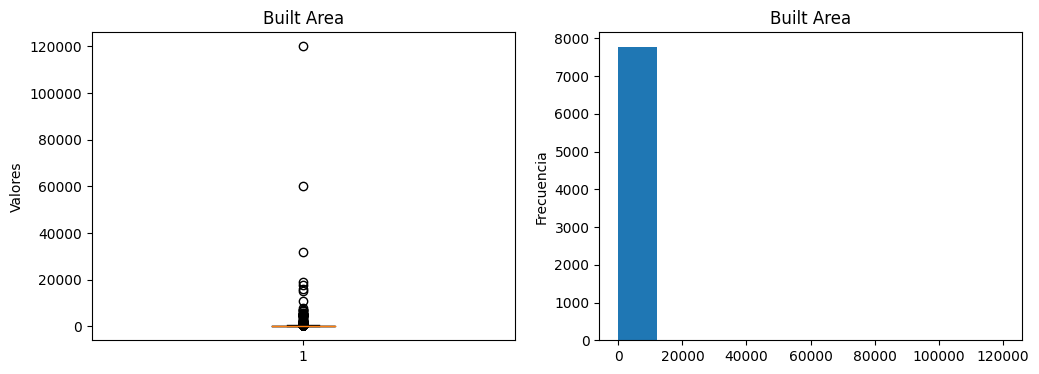

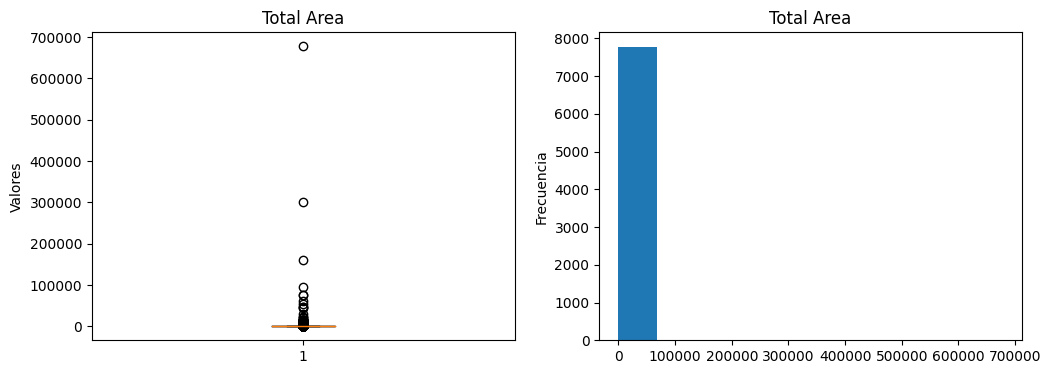

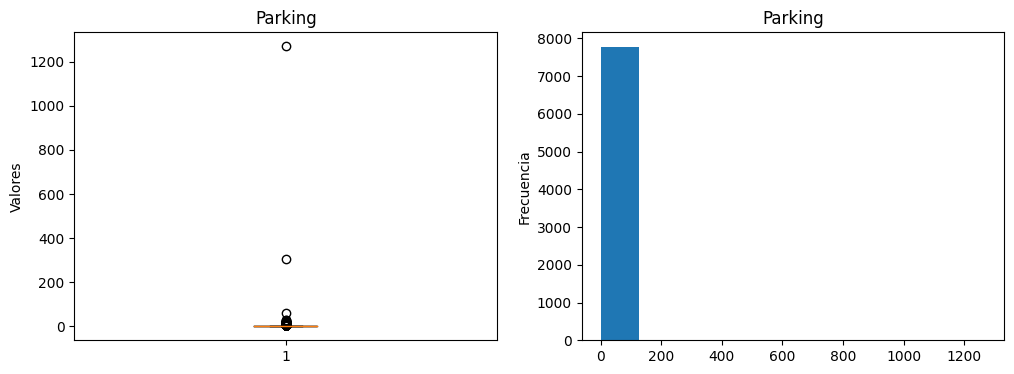

In [63]:
for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12, 4))

    ax[0].boxplot(numeric_cols[col])
    ax[0].set_title(col)
    ax[0].set_ylabel("Valores")

    ax[1].hist(numeric_cols[col])
    ax[1].set_title(col)
    ax[1].set_ylabel("Frecuencia")

    plt.show()